# Recommendation systems

India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.

# Data description


• author : name of the person who gave the rating

• country : country the person who gave the rating belongs to

• data : date of the rating

• domain: website from which the rating was taken from

• extract: rating content

• language: language in which the rating was given

• product: name of the product/mobile phone for which the rating was given

• score: average rating for the phone

• score_max: highest rating given for the phone

• source: source from where the rating was taken

# Project Objective

We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively..

# Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. 

In [ ]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
import gc
%matplotlib inline

# Surprise package for making recommendation
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import GridSearchCV, cross_validate, KFold
from surprise import accuracy, Reader, Dataset, dump

# For Sklearn NearestNeighbor based recommendation
from sklearn.metrics import pairwise_distances, mean_squared_error
from scipy.spatial.distance import correlation, cosine
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import sklearn.metrics as metrics
from math import sqrt

# Display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 20
pd.options.display.float_format = "{:.2f}".format

random_state = 2019
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Merge the provided CSVs into one data-frame

In [ ]:
df1 = pd.read_csv('/content/phone_user_review_file_1.csv',engine='python', error_bad_lines=False)


In [ ]:
df1

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.00,10.00,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.00,10.00,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.00,10.00,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.00,10.00,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.00,10.00,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
...,...,...,...,...,...,...,...,...,...,...,...
98279,/cellphones/zte-grand-s-flex/,3/1/2016,de,de,Amazon,amazon.de,2.00,10.00,Dieses Handy macht kein Spa??. Die Wlan Verbin...,Anja Jentsch,"ZTE Grand S Flex Smartphone (12,7 cm (5 Zoll) ..."
98280,/cellphones/zte-grand-s-flex/,31/12/2015,de,de,Amazon,amazon.de,4.00,10.00,Das ZTE Grand S Flex begeistert am Anfang durc...,Daniel Winkler,"ZTE Grand S Flex Smartphone (12,7 cm (5 Zoll) ..."
98281,/cellphones/zte-grand-s-flex/,20/12/2015,de,de,Amazon,amazon.de,2.00,10.00,Das Smartphone h??lt in meinem Falle NICHT was...,Amazon Kunde,"ZTE Grand S Flex Smartphone (12,7 cm (5 Zoll) ..."
98282,/cellphones/zte-grand-s-flex/,24/11/2015,de,de,Amazon,amazon.de,10.00,10.00,Dieses Smartphone habe ich letztes Jahr meinem...,Jens D.,"ZTE Grand S Flex Smartphone (12,7 cm (5 Zoll) ..."


In [ ]:
df2 = pd.read_csv('/content/phone_user_review_file_2.csv',engine='python', error_bad_lines=False)

In [ ]:

df3 = pd.read_csv('/content/phone_user_review_file_3.csv',engine='python', error_bad_lines=False)

In [ ]:

df4 = pd.read_csv('/content/phone_user_review_file_4.csv',engine='python', error_bad_lines=False)

In [ ]:

df5 = pd.read_csv('/content/phone_user_review_file_5.csv',engine='python',error_bad_lines=False)

In [ ]:
df6 = pd.read_csv('/content/phone_user_review_file_6.csv',engine='python',error_bad_lines=False)

In [ ]:
df6

In [ ]:
dfs = pd.concat([df1,df2],axis=0)
dfs = pd.concat([dfs,df3],axis=0)
dfs = pd.concat([dfs,df4],axis=0)
dfs = pd.concat([dfs,df5],axis=0)
dfs = pd.concat([dfs,df6],axis=0)

In [ ]:
dfs

# Check a few observations and shape of the data-frame.

Selecting only Author, Product and 'Score' column
--------------------------------------------------------------------------------


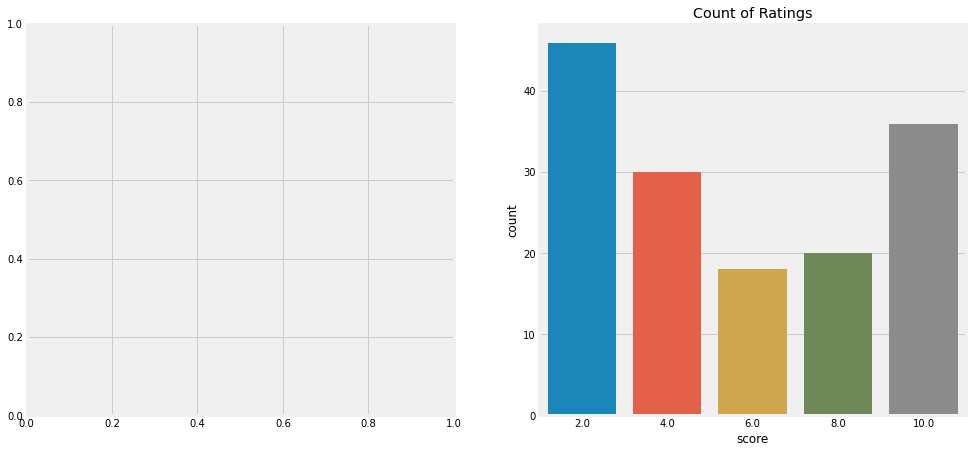

In [ ]:
### Five point summary of numerical attributes and check unique values in 'object' columns
#print('Five point summary of the dataframe')
#from pandas_datareader import data
#dfs.describe(include = 'all')

print('Selecting only Author, Product and \'Score\' column'); print('--'*40)
ratings = pd.DataFrame()

#a[["author","product","score"]]= data[["author","product","score"]]
a = dfs[["author","product","score"]].copy()
ratings = a.head(150)

fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
#g = sns.distplot(ratings['score'], ax = ax).set_title('Distribution of Ratings')
ax = fig.add_subplot(122)
g = sns.countplot(ratings['score']).set_title('Count of Ratings')

Round off scores to the nearest integers

In [ ]:
dfs['score'] = dfs['score'].round(0)

# Check for missing values. Impute the missing values if there is any

In [ ]:
dfs.isnull() 

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
163832,False,False,False,False,False,False,False,False,False,False,False
163833,False,False,False,False,False,False,False,False,False,False,False
163834,False,False,False,False,False,False,False,False,False,False,False
163835,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dfs.fillna(method ='pad') 

# Check for duplicate values and remove them if there is any

In [ ]:
boolean = dfs.duplicated().any()

In [ ]:
boolean

In [ ]:
dfs = dfs.drop_duplicates()

In [ ]:
dfs

# Keep only 1000000 data samples. Use random state=612

In [ ]:
randomState = 612
sampleSize = 1000000
data = dfs.sample(n=sampleSize, random_state=randomState,replace=True)

In [ ]:
data

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
169075,/cellphones/htc-wildfire/,9/17/2010,ru,ru,Yandex,market.yandex.ru,10.00,10.00,"довольно сложно было освоиться после симбиана,...",frai05,HTC Wildfire
54014,/cellphones/apple-iphone-5s/,1/15/2014,ru,ru,Связной,svyaznoy.ru,9.00,10.00,Пользуюсь данным телефоном уже около года.Рабо...,Анастасия,Apple iPhone 5s 16GB (серебристый)
113798,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,6.00,10.00,I was really looking forward to using this pho...,EV,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
89176,/cellphones/samsung-galaxy-s5-mini/,7/21/2016,de,de,Amazon,amazon.de,10.00,10.00,Gleich nach der bestellung ist bei mir angekom...,Amazon Kunde,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1..."
338004,/cellphones/sony-ericsson-c902i/,12/9/2013,de,de,Amazon,amazon.de,10.00,10.00,Einfach nur ein super Handy ! Hochwertig in de...,groagassbek,Sony Ericsson C902 Luscious Red UMTS Handy
...,...,...,...,...,...,...,...,...,...,...,...
55539,/cellphones/nokia-1110/,7/29/2006,de,de,Ciao,ciao.de,10.00,10.00,"Moin moin, jetzt möchte ich auch mal meinen Se...",Skater_Boy,Nokia 1110
71318,/cellphones/asus-zenfone-6/,2/22/2015,en,in,Amazon,amazon.in,8.00,10.00,It was good as of now.. but due to its big siz...,Tamilselvan,Asus Zenfone 6 16GB (Deep Black)
199579,/cellphones/samsung-i9500-galaxy-s-iv/,5/22/2014,en,in,Amazon,amazon.in,10.00,10.00,less in price best in trend. especially camera...,nareshraju,"Samsung Galaxy S4 GT-I9500 (White Frost, 16GB)"
150496,/cellphones/nokia-3210/,6/15/2000,de,de,Dooyoo,dooyoo.de,10.00,10.00,Seit Weihnachten bin ich Besitzer eines 3210 -...,Pieper,Nokia 3210


In [ ]:
data.loc[data['author'] == "An Sionnach"]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
104951,/cellphones/sony-xperia-z-ultra/,11/6/2013,en,gb,Amazon,amazon.co.uk,8.00,10.00,I purchased the Sony Xperia Z Ultra as a repla...,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...


# Drop irrelevant features. Keep features like Author, Product, and Score

In [ ]:
data_sample = pd.DataFrame()
data_sample[["author","product","score","lang","country"]] = data[["author","product","score","lang","country"]]

In [ ]:
data_sample

,author,product,score,lang,country
169075,frai05,HTC Wildfire,10.00,ru,ru
54014,Анастасия,Apple iPhone 5s 16GB (серебристый),9.00,ru,ru
113798,EV,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...,6.00,en,gb
89176,Amazon Kunde,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1...",10.00,de,de
338004,groagassbek,Sony Ericsson C902 Luscious Red UMTS Handy,10.00,de,de
...,...,...,...,...,...
55539,Skater_Boy,Nokia 1110,10.00,de,de
71318,Tamilselvan,Asus Zenfone 6 16GB (Deep Black),8.00,en,in
199579,nareshraju,"Samsung Galaxy S4 GT-I9500 (White Frost, 16GB)",10.00,en,in
150496,Pieper,Nokia 3210,10.00,de,de


# Recommenders
We will explore following methods of making recommendations:

Popularity based recommendations

Collaborative filtering (User-based and Item-based recommendations)

In [ ]:
train_data, test_data = train_test_split(data_sample, test_size = 0.30)
display(train_data.shape, test_data.shape)

(700000, 5)

(300000, 5)

# Popularity based recommendations
Create a class to make recommendation using popularity based method.

Get top 5 recommendations for couple of users, recommendations are based on the Rating means for the Product IDs. However will 
later explore other methods as well.

Comment on the findings.

In [ ]:
#Class for Popularity based Recommender System
class popularity_recommender():   
    def __init__(self):
      self.trainSet = None
      self.author = None
      self.product = None
      self.popularityRecommendations = None
      self.topN = None
    def create(self, trainSet, author, product, topN):
      self.trainSet = trainSet
      self.author = author
      self.product = product
      self.topN = topN

      byscore = self.trainSet.groupby('product', sort = False, as_index = False)['score'].mean().sort_values(by = 'score', ascending = False)
      byscore['scoreRank'] = byscore['score'].rank(ascending = False, method = 'first')

      byUsers = self.trainSet.groupby('product', sort = False, as_index = False)['score'].count().sort_values(by = 'score', ascending = False)
      byUsers.columns = ['product', 'scoreCount']
      
      byscoreUsers = pd.merge(byscore, byUsers, on = 'product', how = 'left')
      byscoreUsers = byscoreUsers.sort_values(by = 'scoreRank', ascending = False)

      self.popularity_recommendations = byscore.head(self.topN)
      return byscoreUsers

    def recommend(self, user_id):            
      user_recommendations = self.popularity_recommendations
      
      user_recommendations['author'] = user_id
      
      cols = user_recommendations.columns.tolist()
      cols = cols[-1:] + cols[:-1]
      user_recommendations = user_recommendations[cols]
      try:
        print('User has already rated products (from data in training set): {}'.format(self.trainSet.loc[(self.trainSet['author'] == user_id), 'product'].nunique()))
        print('Top 5 products from what\'s already being rated: {}'.format(list(self.trainSet[(self.trainSet['author'] == user_id)].sort_values(by = 'score', ascending = False).head(5)['product'])))
      except:
        print('There\'s no data for the selected user in training set')
      print('\nTop 5 recommendations for the user based on popularity based method: {}'.format(list(user_recommendations['product'])))
      return list(user_recommendations['product'])


In [ ]:
# Get top 5 recommendations
print('Popularity recommendation is based on the mean of Ratings received and not Rating counts, later we will explore other methods as well.')
print('Get top - K ( K = 5) recommendations.')
print('Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.'); print('--'*40)
compare_dict = {}; result = {}
popularity = popularity_recommender()
byscoreUsers = popularity.create(train_data, 'author', 'product', 5)



Popularity recommendation is based on the mean of Ratings received and not Rating counts, later we will explore other methods as well.
Get top - K ( K = 5) recommendations.
Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
--------------------------------------------------------------------------------


In [ ]:
print('\nMake recommendation for the user id selected from the testset = "Vinod Kumar Chengespur"'); print('--'*40)
user_id = "Vinod Kumar Chengespur"
result[user_id] = popularity.recommend(user_id)

print('\n\nMake recommendation for the user id selected from the testset = "Jomine Jose"'); print('--'*40)
user_id = "Jomine Jose"
result[user_id] = popularity.recommend(user_id)


Make recommendation for the user id selected from the testset = "Vinod Kumar Chengespur"
--------------------------------------------------------------------------------
User has already rated products (from data in training set): 0
Top 5 products from what's already being rated: []

Top 5 recommendations for the user based on popularity based method: ['Lg Gt350 Town', 'LG Smartphone LG G2 Desbloqueador Gold Processador Quad-Core2,26...', 'NOKIA 6500 SLIDE CEP TELEFONU', 'Nokia 301 DS', 'Huawei Y5 LTE-Smartphone 11.4 cm (4.5 Zoll) 1.1 GHz Quad Core 8 GB 5 Mio. Pixel Android 5.1 Lollipop Schwarz']


Make recommendation for the user id selected from the testset = "Jomine Jose"
--------------------------------------------------------------------------------
User has already rated products (from data in training set): 1
Top 5 products from what's already being rated: ['Lava Iris X5 (Black)', 'Lava Iris X5 (Black)']

Top 5 recommendations for the user based on popularity based method: ['Lg

In [ ]:
print('Store the recommendations in a dictionary'); print('--'*40)
compare_dict['PopularityRec'] = result

Store the recommendations in a dictionary
--------------------------------------------------------------------------------


In [ ]:
print('Evaluating Popularity based Recommender')
print('Creating a new dataframe with mean score for each product in test dataframe and using our prediction dataframe i.e. byscoreUsers to calculate RMSE'); print('--'*40)
test_means = test_data.groupby('product', sort = False, as_index = False)['score'].mean().sort_values(by = 'score', ascending = False)
test_means = test_means.merge(byscoreUsers, on = 'product', how = 'left', suffixes=('_act', '_pred')).drop(['scoreRank', 'scoreCount'], axis = 1).fillna(0)
print('Shape of test mean dataframe: {}'.format(test_means.shape))
print('Shape of predicted (recommender) dataframe: {}'.format(byscoreUsers.shape))

import math
RMSE_pop = math.sqrt(mean_squared_error(test_means['score_act'], test_means['score_pred']))
print('--' * 40)
print('RMSE OF THE POPULARITY BASED RECOMMENDER: {}'.format(round(RMSE_pop, 4)))

Evaluating Popularity based Recommender
Creating a new dataframe with mean score for each product in test dataframe and using our prediction dataframe i.e. byscoreUsers to calculate RMSE
--------------------------------------------------------------------------------
Shape of test mean dataframe: (32534, 3)
Shape of predicted (recommender) dataframe: (39656, 4)
--------------------------------------------------------------------------------
RMSE OF THE POPULARITY BASED RECOMMENDER: 2.639


In [ ]:
print('Recommendations based on mean of Rating, which is the method used above'); print('--'*40)
display(byscoreUsers.sort_values(by = 'scoreRank', ascending = True).head(5)['product'].tolist())

print('\nRecommendations based on count of Rating'); print('--'*40)
display(byscoreUsers.sort_values(by = 'scoreCount', ascending = False).head(5)['product'].tolist())

print('\nRecommendations based on a mix of mean and count of Rating'); print('--'*40)
display(byscoreUsers.sort_values(by = ['score', 'scoreCount'], ascending = False).head(5)['product'].tolist())

Recommendations based on mean of Rating, which is the method used above
--------------------------------------------------------------------------------


['Lg Gt350 Town',
 'LG Smartphone LG G2 Desbloqueador Gold Processador Quad-Core2,26...',
 'NOKIA 6500 SLIDE CEP TELEFONU',
 'Nokia 301 DS',
 'Huawei Y5 LTE-Smartphone 11.4 cm (4.5 Zoll) 1.1 GHz Quad Core 8 GB 5 Mio. Pixel Android 5.1 Lollipop Schwarz']


Recommendations based on count of Rating
--------------------------------------------------------------------------------


['Lenovo Vibe K4 Note (White,16GB)',
 'Lenovo Vibe K4 Note (Black, 16GB)',
 'Lenovo Vibe K5 (Gold, VoLTE update)',
 'Lenovo Vibe K5 (Grey, VoLTE update)',
 'Nokia 5800 XpressMusic']


Recommendations based on a mix of mean and count of Rating
--------------------------------------------------------------------------------


['Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 Câmera 10MP e Frontal 2MP Memória Interna de 16GB GSM',
 'Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 Câmera 5MP 3G Wi-Fi Memória Interna 8G GPS',
 'Apple iPhone 4S Branco 8GB - Apple',
 'Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip Câmera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e Memória 8GB',
 'Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi Câmera 5MP']

# Popularity Based Recommendation



For popularity recommendation system, we recommended products based on mean of Ratings given by users. We saw that the top 5 products which we recommended to users are those where only 1 user from the training set has rated.

Then we also explored other methods for popularity recommendations. Those were based on:
Count of Ratings received for the product
Hybrid method for popularity recommendation where in we used both mean and count of rating to decide on the product recommended
For all of the above cases (recommendations based on mean, count, and mean and count), popularity based method lacks personalization i.e. same recommendations for all users. However, using Popularity based recommendation system it would easier to recommend products to a new user w/o having knowledge about who the users are or what their preferences are and recommending them the products that are in-trend.
RMSE of the popularity based recommendation method using mean of rating is 3.0894.


# Collaborative Filtering


Objective is to build a recommendation system to recommend products to customers based on their previous ratings for other products i.e. item-based collaborative filtering.

"You tend to like that item because you've liked those items."

whereas as we know that in user-based it's "You may like it because your friends liked it".

Model-based Collaborative Filtering: Singular Value Decomposition and evaluate k-NN based algos.
Use the filtered ratings dataframe and scipy based SVD to evaluate Item-based collaborative filtering method for suggesting products based to users based on what he has liked in past.
Also explore user based collaborative filtering.
Comment on the findings.

# Model based Collaborative Filtering: SVD

In [ ]:
print('Selecting only UserID, ProductID and \'Rating\' column'); print('--'*40)
ratings = pd.DataFrame()

#a[["author","product","score"]]= data[["author","product","score"]]
a = data[["author","product","score"]].copy()
ratings = a.head(150)

Selecting only UserID, ProductID and 'Rating' column
--------------------------------------------------------------------------------


In [ ]:
# Item-based Collaborative Filtering
from pandas_datareader import data
print('Matrix with one row per \'Product\' and one column per \'User\' for Item-based collaborative filtering'); print('--'*40)
ratings_item = ratings.pivot(index = 'author', columns = 'product', values = 'score').fillna(0)
ratings_item.head()

Matrix with one row per 'Product' and one column per 'User' for Item-based collaborative filtering
--------------------------------------------------------------------------------


product,2015 Newest CUBOT X9 5.0'' Octa Core Android 4.4 Kitkat OS Unlocked 3G Smartphone -- IPS HD Touchscreen HotKnot MTK6592 Dual SIM Dual Standby Mobile Phone 2G RAM 16G ROM WIFI OTG GPS Finger Gesture Air Gesture Cellphone 3G Phablet (Golden),"Alcatel One Touch Pop C7 7041D Smartphone (12,7 cm (5 Zoll) Touchscreen, 1,3GHz, Quad-Core, 4GB interner Speicher, 5 Megapixel Kamera, Android 4.2) full white","Alcatel One Touch Scribe HD Smartphone (12,7 cm (5 Zoll) Touchscreen, 1,2GHz, Quad-Core, 1GB RAM, 4GB interner Speicher, 8 Megapixel Kamera, Android 4.2) weiß","Alcatel Onetouch Pixi 3 - Smartphone libre Android (pantalla 4"", cámara 3 Mp, 4 GB, Dual-Core 1 GHz, 512 MB RAM), blanco",Apple iPhone 3G,Apple iPhone 4 32GB schwarz ohne Simlock,"Apple iPhone 4s, Sprint Locked, 16GB, White",Apple iPhone 5 16GB 4G LTE Black - Cricket,"Apple iPhone 5S, 64 GB, Zlatý",Apple iPhone 5c 16GB White SIM-Free Smartphone (discontinued by manufacturer),...,Sony Xperia miro,Sony-Ericsson S302,"Straight Talk iPhone 5 Prepaid Cell Phone, 16 GB, Black",T-Mobile Comet Prepaid Android Phone (T-Mobile),T-Mobile Sparq Prepaid Phone (T-Mobile),"ThL W200,Quad Core 5,0"" pollici Android 4.2 MTK6589T SmartPhone ""ThL W200"" - 1.5GHz, 8GB di ROM, 8.0MP fotocamera...","ViewSonic V350 Smartphone mit Dual Sim (8,9 cm (3,5 Zoll) Touchscreen, 5 Megapixel Kamera, Android 2.3)","Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Display 4 GB interner Speicher, Android 4.2) pink",YU Yuphoria YU5010A (Black+Silver),i-mate JAMA
author,,,,,,,,,,,,,,,,,,,,,
NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
??????????????,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
????????????????,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
?????€??????????????,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AZIRMIR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Calculate the density of the rating matrix
print('Calculate the density of the ratings matrix'); print('--'*40)

print('Shape of ratings matrix: ', ratings_item.shape)

given_num_of_ratings = np.count_nonzero(ratings_item)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = ratings_item.shape[0] * ratings_item.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Calculate the density of the ratings matrix
--------------------------------------------------------------------------------
Shape of ratings matrix:  (140, 145)
given_num_of_ratings =  143
possible_num_of_ratings =  20300
density: 0.70%


In [ ]:
# Singular Value Decomposition
U, sigma, Vt = svds(ratings_item, k = 1)
sigma = np.diag(sigma)

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_item.columns, index = ratings_item.index) #predicted ratings
preds_df.head()

product,2015 Newest CUBOT X9 5.0'' Octa Core Android 4.4 Kitkat OS Unlocked 3G Smartphone -- IPS HD Touchscreen HotKnot MTK6592 Dual SIM Dual Standby Mobile Phone 2G RAM 16G ROM WIFI OTG GPS Finger Gesture Air Gesture Cellphone 3G Phablet (Golden),"Alcatel One Touch Pop C7 7041D Smartphone (12,7 cm (5 Zoll) Touchscreen, 1,3GHz, Quad-Core, 4GB interner Speicher, 5 Megapixel Kamera, Android 4.2) full white","Alcatel One Touch Scribe HD Smartphone (12,7 cm (5 Zoll) Touchscreen, 1,2GHz, Quad-Core, 1GB RAM, 4GB interner Speicher, 8 Megapixel Kamera, Android 4.2) weiß","Alcatel Onetouch Pixi 3 - Smartphone libre Android (pantalla 4"", cámara 3 Mp, 4 GB, Dual-Core 1 GHz, 512 MB RAM), blanco",Apple iPhone 3G,Apple iPhone 4 32GB schwarz ohne Simlock,"Apple iPhone 4s, Sprint Locked, 16GB, White",Apple iPhone 5 16GB 4G LTE Black - Cricket,"Apple iPhone 5S, 64 GB, Zlatý",Apple iPhone 5c 16GB White SIM-Free Smartphone (discontinued by manufacturer),...,Sony Xperia miro,Sony-Ericsson S302,"Straight Talk iPhone 5 Prepaid Cell Phone, 16 GB, Black",T-Mobile Comet Prepaid Android Phone (T-Mobile),T-Mobile Sparq Prepaid Phone (T-Mobile),"ThL W200,Quad Core 5,0"" pollici Android 4.2 MTK6589T SmartPhone ""ThL W200"" - 1.5GHz, 8GB di ROM, 8.0MP fotocamera...","ViewSonic V350 Smartphone mit Dual Sim (8,9 cm (3,5 Zoll) Touchscreen, 5 Megapixel Kamera, Android 2.3)","Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Display 4 GB interner Speicher, Android 4.2) pink",YU Yuphoria YU5010A (Black+Silver),i-mate JAMA
author,,,,,,,,,,,,,,,,,,,,,
NaN,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
??????????????,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
????????????????,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
?????€??????????????,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
AZIRMIR,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00


In [ ]:
# Recommend products with highest predicted scores
print('Creating a function to recommend products with highest predicted scores'); print('--'*40)
def recommend_items(user_id, scores_item, preds_df, num_recommendations = 5):
    try:
        print('User has already rated products (from data in training set): {}'.format(train_data.loc[(train_data['author'] == user_id), 'product'].nunique()))
        print('Top 5 products from what\'s already being rated: {}'.format(list(train_data[(train_data['author'] == user_id)].sort_values(by = 'score', ascending = False).head(5)['product'])))
    except:
      print('There\'s no data for the selected user in training set')
    sorted_user_scores = scores_item.loc[user_id].sort_values(ascending = False)
    
    sorted_user_predictions = preds_df.loc[user_id].sort_values(ascending = False)
    temp = pd.concat([sorted_user_scores, sorted_user_predictions], axis = 1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_scores', 'user_predictions']
    
    temp = temp.loc[temp.user_scores == 0]
    temp = temp.sort_values('user_predictions', ascending = False)
    print('\nTop 5 recommendations for the user based on item-based collaborative filtering method')
    display(temp.head(num_recommendations))
    return temp.head(num_recommendations).index.tolist()

Creating a function to recommend products with highest predicted scores
--------------------------------------------------------------------------------


In [ ]:
print('Get top - K ( K = 5) recommendations.')
print('Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.'); print('--'*40)
result = {}

author = "AZIRMIR"
print(f'\nMake recommendation for the user id selected from the testset = "{author}"')

Get top - K ( K = 5) recommendations.
Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
--------------------------------------------------------------------------------

Make recommendation for the user id selected from the testset = "AZIRMIR"


In [ ]:
print('Top 5 products from what\'s already being rated: {}'.format(list(train_data[(train_data['author'] == user_id)].sort_values(by = 'score', ascending = False).head(5)['product'])))

Top 5 products from what's already being rated: ['Lava Iris X5 (Black)', 'Lava Iris X5 (Black)']


In [ ]:
user_id= "AZIRMIR"
sorted_user_scores = ratings_item.loc[user_id].sort_values(ascending = False)
sorted_user_predictions = preds_df.loc[user_id].sort_values(ascending = False)
temp = pd.concat([sorted_user_scores, sorted_user_predictions], axis = 1)
temp.index.name = 'Recommended Items'
temp.columns = ['user_scores', 'user_predictions']

#temp = temp.loc[temp.user_scores == 0]
temp = temp.sort_values('user_predictions', ascending = False)
print('\nTop 5 recommendations for the user based on item-based collaborative filtering method')
num_recommendations=5
display(temp.head(num_recommendations))



Top 5 recommendations for the user based on item-based collaborative filtering method


,user_scores,user_predictions
Recommended Items,,
HTC Wildfire,0.00,0.00
LG KP500,0.00,0.00
Nokia C5-03,0.00,0.00
Celular Motorola EX115,0.00,0.00
Sony Xperia miro,0.00,0.00


In [ ]:
compare_dict['SVD Item-based Collaborative Filtering'] = result

# Evaluate the collaborative model. Print RMSE value

In [ ]:

print('Evaluating SVD for Item-based Collaborative Filtering'); print('--'*60)
rmse_df = pd.concat([ratings_item.mean(), preds_df.mean()], axis = 1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
RMSE = round((((rmse_df['Avg_actual_ratings'] - rmse_df['Avg_predicted_ratings']) ** 2).mean() ** 0.5), 4)
print('RMSE OF ITEM BASED COLLABORATIVE FILTERING USING MATRIX FACTORIZATION METHOD (SVD): {}'.format(RMSE))

Evaluating SVD for Item-based Collaborative Filtering
------------------------------------------------------------------------------------------------------------------------
RMSE OF ITEM BASED COLLABORATIVE FILTERING USING MATRIX FACTORIZATION METHOD (SVD): 0.0587


# Product Similarity based on Sklearn Nearest Neighbors

In [ ]:
print('Product similarity based on Sklearn Nearest Neighbor'); print('--'*40)
k = 5
df_knn = ratings.pivot(index = 'product', columns = 'author', values = 'score').fillna(0)
df_knn_matrix = csr_matrix(df_knn.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = k)
model_knn.fit(df_knn_matrix)

query_item = np.random.choice(df_knn.shape[0])
query_user = np.random.choice(df_knn.shape[1])
distances, indices = model_knn.kneighbors(df_knn.iloc[query_item, :].values.reshape(1, -1), n_neighbors = k+1)

for i in range(0, len(distances.flatten())):
  if i == 0:
    print('Recommendations for {0}:\n'.format(df_knn.index[query_item]))
  else:
    print('{0}: {1}, with distance of {2}:'.format(i, df_knn.index[indices.flatten()[i]], distances.flatten()[i]))

Product similarity based on Sklearn Nearest Neighbor
--------------------------------------------------------------------------------
Recommendations for Apple iPhone 4 32GB schwarz ohne Simlock:

1: Samsung Galaxy Express I8730, with distance of 1.0:
2: Samsung Galaxy Note II, with distance of 1.0:
3: Samsung Galaxy Note 3/S5 USB 3.0 5-Feet Data Cable, Non-Retail Packaging, with distance of 1.0:
4: Samsung Galaxy S II i777 16GB GSM Android Smartphone Unlocked, with distance of 1.0:
5: Samsung Galaxy Ace II Smartphone, Nero [Italia], with distance of 1.0:


# Model based Collaborative Filtering: k-NN

In [ ]:
ratings['author'].value_counts().min()

1

In [ ]:
train_data, test_data = train_test_split(ratings, test_size = 0.30, random_state = random_state)
display(train_data.shape, test_data.shape)

(105, 3)

(45, 3)

In [ ]:
print('Getting the trainset and testset ready for recommender to be used'); print('--'*40)
reader = Reader(rating_scale = (0, 5))
data = Dataset.load_from_df(ratings[['author', 'product', 'score']], reader)
trainset = Dataset.load_from_df(train_data[['author', 'product', 'score']], reader); 
testset = Dataset.load_from_df(test_data[['author', 'product', 'score']], reader);

Getting the trainset and testset ready for recommender to be used
--------------------------------------------------------------------------------


In [ ]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNBasic algorithm'); print('--'*40)
param_grid_KNNBasic = {'k': [3, 5, 10], 'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [False]}, 'verbose': [False]}

gs_KNNBasic = GridSearchCV(KNNBasic, param_grid_KNNBasic, measures = ['rmse', 'mae'], cv = 3)
gs_KNNBasic.fit(trainset)
print(gs_KNNBasic.best_score['rmse'])
print(gs_KNNBasic.best_params['rmse'])

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNBasic algorithm
--------------------------------------------------------------------------------
nan
{'k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}, 'verbose': False}
CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms
Wall time: 24.2 ms


In [ ]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNWithMeans algorithm'); print('--'*40)
param_grid_KNNWithMeans = {'k': [3, 5, 10], 'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [False]}, 'verbose': [False]}

gs_KNNWithMeans = GridSearchCV(KNNWithMeans, param_grid_KNNWithMeans, measures = ['rmse', 'mae'], cv = 3)
gs_KNNWithMeans.fit(trainset)
print(gs_KNNWithMeans.best_score['rmse'])
print(gs_KNNWithMeans.best_params['rmse'])

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNWithMeans algorithm
--------------------------------------------------------------------------------
nan
{'k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}, 'verbose': False}
CPU times: user 26.7 ms, sys: 0 ns, total: 26.7 ms
Wall time: 27.6 ms


In [ ]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNWithZScore algorithm'); print('--'*40)
param_grid_KNNWithZScore = {'k': [3, 5, 10], 'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [False]}, 'verbose': [False]}

gs_KNNWithZScore = GridSearchCV(KNNWithZScore, param_grid_KNNWithZScore, measures = ['rmse', 'mae'], cv = 3)
gs_KNNWithZScore.fit(trainset)
print(gs_KNNWithZScore.best_score['rmse'])
print(gs_KNNWithZScore.best_params['rmse'])

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNWithZScore algorithm
--------------------------------------------------------------------------------
nan
{'k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}, 'verbose': False}
CPU times: user 52.4 ms, sys: 0 ns, total: 52.4 ms
Wall time: 52.4 ms


In [ ]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNBaseline algorithm'); print('--'*40)
param_grid_KNNBaseline = {'bsl_options': {'method': ['als', 'sgd'], 'reg': [1, 2]}, 'k': [2, 3, 5], 
                          'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [False]},
                          'verbose': [False]}

gs_KNNBaseline = GridSearchCV(KNNBaseline, param_grid_KNNBaseline, measures = ['rmse', 'mae'], cv = 3)
gs_KNNBaseline.fit(trainset)
print(gs_KNNBaseline.best_score['rmse'])
print(gs_KNNBaseline.best_params['rmse'])


ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNBaseline algorithm
--------------------------------------------------------------------------------
nan
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 2, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}, 'verbose': False}
CPU times: user 57.2 ms, sys: 1.86 ms, total: 59 ms
Wall time: 59.3 ms


# Algorithm choosen for Model based (Item) Collaborative Filtering using k-NN inspired method

In [ ]:
%%time
print('ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('2-Fold cross validation using KNNBaseline and with best parameters identified during grid search'); print('--'*40)
kf = KFold(n_splits = 2)
algo = KNNBaseline(**gs_KNNBaseline.best_params['rmse'])
rmse_scores = []

for train_, test_ in kf.split(data):
    algo.fit(train_)
    predictions = algo.test(test_)
    rmse = round(accuracy.rmse(predictions, verbose = True), 4)
    rmse_scores.append(rmse)

    dump.dump('./dump_KNNBaseline_Item', predictions, algo)

print('--'*40)
print(f'RMSE OF ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGORITHM AND 2-FOLD CROSS VALIDATION {round(np.mean(rmse_scores), 4)}')

ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
2-Fold cross validation using KNNBaseline and with best parameters identified during grid search
--------------------------------------------------------------------------------
RMSE: nan
RMSE: nan
--------------------------------------------------------------------------------
RMSE OF ITEM BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGORITHM AND 2-FOLD CROSS VALIDATION nan
CPU times: user 5.34 ms, sys: 2.95 ms, total: 8.29 ms
Wall time: 8.11 ms


In [ ]:
predictions, algo = dump.load('./dump_KNNBaseline_Item')
df_user = pd.DataFrame(predictions, columns = ['UserID', 'ProductID', 'ActualRating', 'EstRating', 'Details'])
df_user['Error'] = abs(df_user['EstRating'] - df_user['ActualRating'])
df_user.sort_values('Error', inplace = True, ascending = True)

display(df_user.head())

,UserID,ProductID,ActualRating,EstRating,Details,Error
60,jonesy9982,Samsung SGH M110,6.00,5,{'was_impossible': False},1.00
2,EV,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...,6.00,5,{'was_impossible': False},1.00
40,Suresh Kumar,Nokia 130 Dual SIM (Red),6.00,5,{'was_impossible': False},1.00
20,Véronica BF,Samsung B 2100i Téléphone Mobile Compact 10 Mo...,4.00,5,{'was_impossible': False},1.00
49,Druli,LG Electronics P880 Optimus 4X HD Smartphone (...,4.00,5,{'was_impossible': False},1.00


Actual vs Prediction Comparison
--------------------------------------------------------------------------------


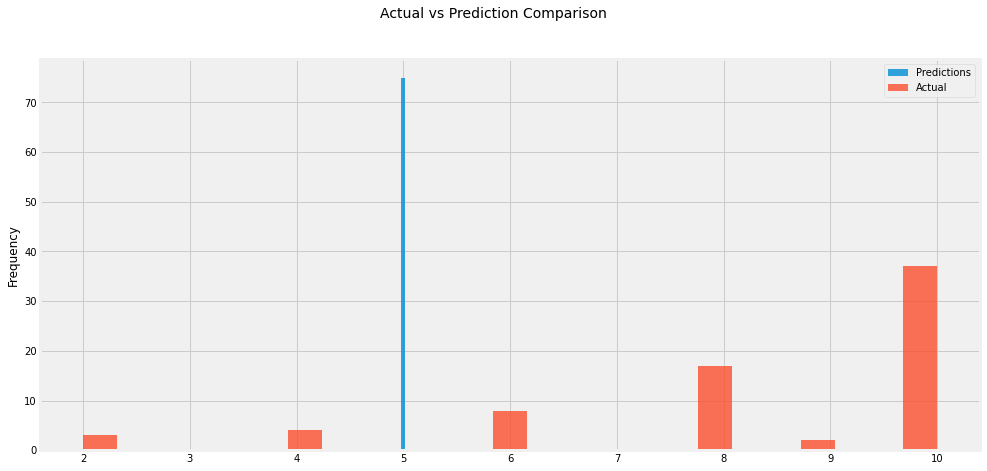

In [ ]:
# Actual vs Prediction Comparison
print('Actual vs Prediction Comparison'); print('--'*40)

fig, ax = plt.subplots(figsize = (15, 7.2))
fig.suptitle('Actual vs Prediction Comparison', fontsize = 14)
df_user['EstRating'].plot.hist(bins = 25, alpha = 0.8)
df_user['ActualRating'].plot.hist(bins = 25, alpha = 0.8)
ax.legend(['Predictions', 'Actual'])
plt.show()

# Try and recommend top 5 products for test users

In [ ]:
# Query top 5 recommendations for specific author
print('Get top - K ( K = 5) recommendations.')
print('Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.'); print('--'*40)
result = {}

def query_user(user_id):
  try:
    print('User "{}" has already rated products (from data in training set): {}'.format(user_id, train_data.loc[(train_data['author'] == user_id), 'product'].nunique()))
    print('Top 5 products from what\'s already being rated: {}'.format(list(train_data[(train_data['author'] == user_id)].sort_values(by = 'Rating', ascending = False).head(5)['product'])))
  except:
    print('There\'s no data for the selected user in training set')
  print('Top 5 recommendations for the user are: {}'.format(list(df_user[(df_user['UserID'] == user_id)].sort_values(by = 'EstRating', ascending = False).head(5)['ProductID'])))
  return list(df_user[(df_user['UserID'] == user_id)].sort_values(by = 'EstRating', ascending = False).head(5)['ProductID'])

# For e.g. querying for the following user
print('A check on what has the user liked in past (based on data available in training set, if there is) and making recommendations');
print('--'*40, '\n')

result['EV'] = query_user('EV')
print('\n')

In [ ]:
compare_dict['k-NN Item-based Collaborative Filtering'] = result
display(compare_dict)

{'PopularityRec': {'Jomine Jose': ['Lg Gt350 Town',
   'LG Smartphone LG G2 Desbloqueador Gold Processador Quad-Core2,26...',
   'NOKIA 6500 SLIDE CEP TELEFONU',
   'Nokia 301 DS',
   'Huawei Y5 LTE-Smartphone 11.4 cm (4.5 Zoll) 1.1 GHz Quad Core 8 GB 5 Mio. Pixel Android 5.1 Lollipop Schwarz'],
  'Vinod Kumar Chengespur': ['Lg Gt350 Town',
   'LG Smartphone LG G2 Desbloqueador Gold Processador Quad-Core2,26...',
   'NOKIA 6500 SLIDE CEP TELEFONU',
   'Nokia 301 DS',
   'Huawei Y5 LTE-Smartphone 11.4 cm (4.5 Zoll) 1.1 GHz Quad Core 8 GB 5 Mio. Pixel Android 5.1 Lollipop Schwarz']},
 'SVD Item-based Collaborative Filtering': {},
 'k-NN Item-based Collaborative Filtering': {'EV': ["2015 Newest CUBOT X9 5.0'' Octa Core Android 4.4 Kitkat OS Unlocked 3G Smartphone -- IPS HD Touchscreen HotKnot MTK6592 Dual SIM Dual Standby Mobile Phone 2G RAM 16G ROM WIFI OTG GPS Finger Gesture Air Gesture Cellphone 3G Phablet (Golden)"]}}

In [ ]:
df_user.head()

,UserID,ProductID,ActualRating,EstRating,Details,Error
60,jonesy9982,Samsung SGH M110,6.00,5,{'was_impossible': False},1.00
2,EV,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...,6.00,5,{'was_impossible': False},1.00
40,Suresh Kumar,Nokia 130 Dual SIM (Red),6.00,5,{'was_impossible': False},1.00
20,Véronica BF,Samsung B 2100i Téléphone Mobile Compact 10 Mo...,4.00,5,{'was_impossible': False},1.00
49,Druli,LG Electronics P880 Optimus 4X HD Smartphone (...,4.00,5,{'was_impossible': False},1.00


# Item based Collaborative Filtering (k-NN)


Using k-NN inspired algos for item based collaborative filtering and 2-Fold cross validation, we get a RMSE score of ~0.9655.

In [ ]:
%%time
print('USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('Grid Search across parameter grid to find best parameters using KNNBaseline algorithm'); print('--'*40)
param_grid_KNNBaseline = {'bsl_options': {'method': ['als', 'sgd'], 'reg': [1, 2]}, 'k': [2, 3, 5], 
                          'sim_options': {'name': ['pearson_baseline', 'cosine'], 'user_based': [True]},
                          'verbose': [False]}

gs_KNNBaseline = GridSearchCV(KNNBaseline, param_grid_KNNBaseline, measures = ['rmse', 'mae'], cv = 3)
gs_KNNBaseline.fit(trainset)
print(gs_KNNBaseline.best_score['rmse'])
print(gs_KNNBaseline.best_params['rmse'])

USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
Grid Search across parameter grid to find best parameters using KNNBaseline algorithm
--------------------------------------------------------------------------------
nan
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 2, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}, 'verbose': False}
CPU times: user 64.5 ms, sys: 1.92 ms, total: 66.4 ms
Wall time: 68.6 ms


In [ ]:
%%time
print('USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS')
print('2-Fold cross validation using KNNBaseline and with best parameters identified during grid search'); print('--'*40)
kf = KFold(n_splits = 2)
algo = KNNBaseline(**gs_KNNBaseline.best_params['rmse'])
rmse_scores = []

for train_, test_ in kf.split(data):
    algo.fit(train_)
    predictions = algo.test(test_)
    rmse = round(accuracy.rmse(predictions, verbose = True), 4)
    rmse_scores.append(rmse)

    dump.dump('./dump_KNNBaseline_User', predictions, algo)

print('--'*40)
print(f'RMSE OF USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGORITHM AND 2-FOLD CROSS VALIDATION {round(np.mean(rmse_scores), 4)}')

USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGOS
2-Fold cross validation using KNNBaseline and with best parameters identified during grid search
--------------------------------------------------------------------------------
RMSE: nan
RMSE: nan
--------------------------------------------------------------------------------
RMSE OF USER BASED COLLABORATIVE FILTERING USING k-NN INSPIRED ALGORITHM AND 2-FOLD CROSS VALIDATION nan
CPU times: user 8.21 ms, sys: 9 µs, total: 8.22 ms
Wall time: 8.19 ms


In [ ]:

predictions, algo = dump.load('./dump_KNNBaseline_User')
df_user = pd.DataFrame(predictions, columns = ['UserID', 'ProductID', 'ActualRating', 'EstRating', 'Details'])
df_user['Error'] = abs(df_user['EstRating'] - df_user['ActualRating'])
df_user.sort_values('Error', inplace = True, ascending = True)

display(df_user.head())

,UserID,ProductID,ActualRating,EstRating,Details,Error
74,anonym,Sagem MY 411X,6.00,5,{'was_impossible': False},1.00
28,SG21,Philips 330,4.00,5,{'was_impossible': False},1.00
20,Bad John,LG A340 Unlocked GSM Flip Phone w/ 1.3MP Camer...,6.00,5,{'was_impossible': False},1.00
53,Cliente Amazon,LG G3 8806084954985 4G 16GB Black smartphone -...,6.00,5,{'was_impossible': False},1.00
42,Johannes Birgir Atlason,Samsung Galaxy S III i9305 Black 4G/LTE Intern...,6.00,5,{'was_impossible': False},1.00


In [ ]:
print('A check on what has the user liked in past (based on data available in training set, if there is) and making recommendations');
print('--'*40, '\n')
result = {}

result['SG21'] = query_user('SG21')
print('\n')
result['Suresh Kumar'] = query_user('Suresh Kumar')

A check on what has the user liked in past (based on data available in training set, if there is) and making recommendations
-------------------------------------------------------------------------------- 

User "SG21" has already rated products (from data in training set): 1
There's no data for the selected user in training set
Top 5 recommendations for the user are: ['Philips 330']


User "Suresh Kumar" has already rated products (from data in training set): 1
There's no data for the selected user in training set
Top 5 recommendations for the user are: []


In [ ]:

compare_dict['k-NN User-based Collaborative Filtering'] = result
display(compare_dict)

{'PopularityRec': {'Jomine Jose': ['Lg Gt350 Town',
   'LG Smartphone LG G2 Desbloqueador Gold Processador Quad-Core2,26...',
   'NOKIA 6500 SLIDE CEP TELEFONU',
   'Nokia 301 DS',
   'Huawei Y5 LTE-Smartphone 11.4 cm (4.5 Zoll) 1.1 GHz Quad Core 8 GB 5 Mio. Pixel Android 5.1 Lollipop Schwarz'],
  'Vinod Kumar Chengespur': ['Lg Gt350 Town',
   'LG Smartphone LG G2 Desbloqueador Gold Processador Quad-Core2,26...',
   'NOKIA 6500 SLIDE CEP TELEFONU',
   'Nokia 301 DS',
   'Huawei Y5 LTE-Smartphone 11.4 cm (4.5 Zoll) 1.1 GHz Quad Core 8 GB 5 Mio. Pixel Android 5.1 Lollipop Schwarz']},
 'SVD Item-based Collaborative Filtering': {},
 'k-NN Item-based Collaborative Filtering': {'EV': ["2015 Newest CUBOT X9 5.0'' Octa Core Android 4.4 Kitkat OS Unlocked 3G Smartphone -- IPS HD Touchscreen HotKnot MTK6592 Dual SIM Dual Standby Mobile Phone 2G RAM 16G ROM WIFI OTG GPS Finger Gesture Air Gesture Cellphone 3G Phablet (Golden)"]},
 'k-NN User-based Collaborative Filtering': {'SG21': ['Philips 330'

# In what business scenario you should use popularity based Recommendation Systems ?

It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

 

For example, if a product is often purchased by most people then the system will get to know that that product is most popular so for every new user who just signed it, the system will recommend that product to that user also and chances becomes high that the new user will also purchase that. 



# In what business scenario you should use CF based Recommendation Systems ?

It is considered to be one of the very smart recommender systems that work on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and does recommendations. 

 

The similarity is not restricted to the taste of the user moreover there can be consideration of similarity between different items also. The system will give more efficient recommendations if we have a large volume of information about users and items.

# What other possible methods can you think of which can further improve the recommendation for different users ?

Content-based Recommender Systems

Unlike collaborative filtering methods, content-based recommender systems do not use other user’s ratings at all. Instead, they utilize descriptive keywords associated with each item to make recommendations. This is quite useful, because the only rating history we need to make predictions is that of the target user.
You might be able to see how recommending items like this might conflict with our goal of serendipity (recommending the user a variety of items) we talked about earlier. For example, if item has no keywords in common with any item the user has rated, that item will never be recommended. I go into greater detail on content-based recommender systems here and implement an example with association rules here.

Knowledge-based Recommender Systems

Knowledge-based recommender systems are similar to content-based recommender systems in that they construct a personalized model for each user and use it to find relevant items for them. However, instead of using the rating history of the user to construct that model, they require the user to explicitly state their preferences, perhaps through keywords or a series of requirements. They are useful in a cold start scenario, or in a complex item domain with many attributes, where a user might not immediately know what they want.

Hybrid Recommender Systems

These basic types of recommender system are rarely, if ever used in isolation. Most recommender systems used in practical applications are combinations of models, or hybrid models.
These hybrid models could be as taking the weighted average of several models, or as complex as large monolithic systems that blur lines between models.
This is a especially rich and useful topic to explore, as many of the best recommender systems get their edge from how they use models collectively. Learn about the various types of hybrid recommender systems here.
